In [1]:
%pylab inline
import tensorflow as tf
import pandas as pd

%load_ext autoreload
%autoreload 2
import deltafestimator

inFN = '/home/kmdalton/sandbox/gfpxfel/20190508_integration_protocol/control_reflections_pared_5point0_sigma.csv'

Populating the interactive namespace from numpy and matplotlib


In [2]:
#This notebook will run crossvalidation of the Delta F estimation code between two on datasets
#Needless to say, this is a negative control
def renamer(df):
    if 'A' in df['SERIES']:
        df['SERIES'] = 'on' + df['SERIES'][2]
    else:
        df['SERIES'] = 'off' + df['SERIES'][2]
    return df

I = pd.read_csv(inFN)
I = I[I.SERIES.str.contains('on')].apply(renamer, axis=1)
I

,Unnamed: 0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,SIGMA(FOBS),FCALC,PHIC,MERGEDH,MERGEDK,MERGEDL,MASK,ona,onb,off
40,3010,-0.002046,-0.009911,-0.011282,-0.019221,0.001915,0.000594,0.001307,0.012652,-0.008927,...,2.55625,768.0700,22.4644,-6.0,9.0,4.0,True,False,True,False
41,3011,-0.002046,-0.009911,-0.011282,-0.019221,0.001915,0.000594,0.001307,0.012652,-0.008927,...,16.14810,496.6760,86.0951,-7.0,9.0,5.0,True,False,True,False
42,3012,-0.002046,-0.009911,-0.011282,-0.019221,0.001915,0.000594,0.001307,0.012652,-0.008927,...,2.50014,616.5690,75.7306,-8.0,9.0,6.0,True,False,True,False
43,3056,-0.002046,-0.009911,-0.011282,-0.019221,0.001915,0.000594,0.001307,0.012652,-0.008927,...,2.61310,505.6490,12.7088,-5.0,7.0,4.0,True,False,True,False
44,3059,-0.002046,-0.009911,-0.011282,-0.019221,0.001915,0.000594,0.001307,0.012652,-0.008927,...,2.02897,851.1920,-111.1620,-8.0,7.0,7.0,True,False,True,False
45,3105,-0.002046,-0.009911,-0.011282,-0.019221,0.001915,0.000594,0.001307,0.012652,-0.008927,...,2.67327,625.5210,65.7900,-1.0,5.0,3.0,True,False,True,False
46,3125,-0.002046,-0.009911,-0.011282,-0.019221,0.001915,0.000594,0.001307,0.012652,-0.008927,...,2.47739,716.2530,83.6212,-4.0,4.0,8.0,True,False,True,False
47,3151,-0.002046,-0.009911,-0.011282,-0.019221,0.001915,0.000594,0.001307,0.012652,-0.008927,...,2.47195,1173.2200,-179.2020,-2.0,3.0,2.0,True,False,True,False
48,3199,-0.002046,-0.009911,-0.011282,-0.019221,0.001915,0.000594,0.001307,0.012652,-0.008927,...,2.66945,759.6330,-177.2480,-5.0,1.0,9.0,True,False,True,False
49,3201,-0.002046,-0.009911,-0.011282,-0.019221,0.001915,0.000594,0.001307,0.012652,-0.008927,...,1.62257,2200.2900,-72.4502,-3.0,1.0,5.0,True,False,True,False


In [3]:
columns = {
    'RUN' : int,
    'PHINUMBER': int,
    'SERIES': str, 
    'FOBS': float,
    'SIGMA(FOBS)': float,
    'FCALC': float,
    'PHIC': float,
    'H': int,
    'K': int, 
    'L': int,
    'MERGEDH': int,
    'MERGEDK': int,
    'MERGEDL': int,
    'IOBS': float,
    'SIGMA(IOBS)': float,
    'D': float, 
    'ipm2': float,
    'ipm3': float,
}      
#Pare data to remove combinations of h,k,l,run,phi that don't have both on and off data
#dataframe = gammastimator.pare_data(I, columns)

for k in I:
    if k in columns:
        I[k] = I[k].astype(columns[k])
    else:
        del I[k]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


100%|██████████| 1/1 [01:21<00:00, 81.74s/it]

Completed in 84.12425804138184 s


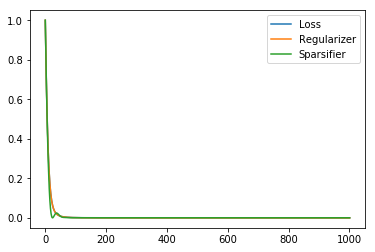

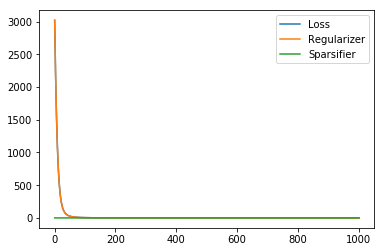

In [4]:
#This will only take a moment and we can use it to diagnose bugs
from time import time
start = time()

rhos = [10000]
lambdas = [0.1]
tolerance = -1.
intensitykey = 'ipm2'
maxiter = 1000
referencekey = 'FCALC'

    

#Ftrace,Icryst,Loss = deltafestimator.gammastimator_classic(
n = deltafestimator.deltafestimator(I)
n.train({'RHO': rhos, 'LAMBDA': lambdas}, maxiter=maxiter, tolerance=tolerance)
Loss = n.log

plt.figure()
for k in ['Loss', 'Regularizer', 'Sparsifier']:
    plt.plot(Loss['Step'], Loss[k]/Loss[k].max(), label=k)
plt.legend()

plt.figure()
for k in ['Loss', 'Regularizer', 'Sparsifier']:
    plt.plot(Loss['Step'], Loss[k], label=k)
plt.legend()


stop = time()
print("Completed in {} s".format(stop-start))

#Loss

Text(0.5, 0, 'IPM %error')

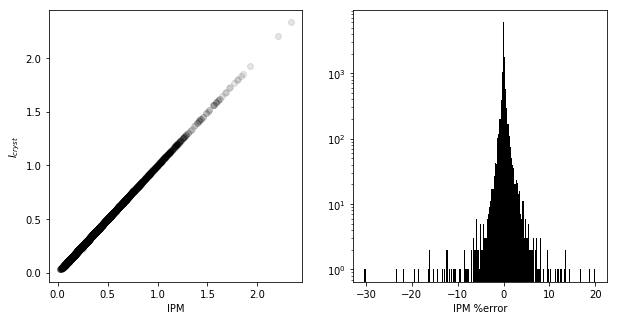

In [5]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
Icryst = n.result['Icryst']['Icryst']
IPM = n.result[intensitykey][intensitykey]
ax1.plot(IPM, Icryst, 'ko', alpha=0.1)
ax1.set_xlabel("IPM")
ax1.set_ylabel(r"$I_{cryst}$")
_ = ax2.hist(100.*(IPM-Icryst)/IPM, 200, color='k', log=True)
ax2.set_xlabel("IPM %error")

In [6]:
I['MASK'] = True
#I['MASK'] = np.array(I[['RUN', 'PHINUMBER', 'MASK']].groupby(['RUN', 'PHINUMBER']).transform(lambda x: np.random.random()) < 0.5)
I['MASK'] = np.array(I[['RUN', 'PHINUMBER', 'MASK']].groupby(['RUN', 'PHINUMBER']).transform(lambda x: np.random.random()) < 0.5)

In [7]:
import tensorflow as tf

tolerance = -1e-5
intensitykey = 'ipm2'
maxiter = 10000
referencekey = 'FCALC'
lmin,lmax,lstep = -3, 4, 10
#lmin,lmax,lstep = -10, -11,2
rmin,rmax,rstep = 0, 10, 8
lambdas = np.logspace(lmin, lmax, lstep)
rhos    = np.logspace(rmin, rmax, rstep)
rhos,lambdas = np.meshgrid(rhos, lambdas)
rhos,lambdas = rhos.flatten(),lambdas.flatten()
optim = tf.train.AdamOptimizer(0.1)
config = tf.ConfigProto(
        device_count = {'GPU': 0}
    )

iters = 1

Ftrace1 = pd.DataFrame()
Ftrace2 = pd.DataFrame()
Icryst = pd.DataFrame()
I['MASK'] = True
for i in range(iters):
    print(f"Iteration {i}:")
    I['MASK'] = np.array(I[['RUN', 'PHINUMBER', 'MASK']].groupby(['RUN', 'PHINUMBER']).transform(lambda x: np.random.random()) < 0.5)
    n = deltafestimator.deltafestimator(I[I['MASK']])
    n.train({'RHO': rhos, 'LAMBDA': lambdas}, optimizer=optim, maxiter=maxiter, tolerance=tolerance)
    _Ftrace1 = n.result['Miller']
    _Icryst1 = n.result['Icryst']
    _Icryst1[intensitykey] = n.result[intensitykey][intensitykey]
    
    _Ftrace1['ITER'] = i
    Ftrace1 = pd.concat((Ftrace1, _Ftrace1))
    _Icryst1['ITER'] = i
    _Icryst1['HALF'] = 1
    Icryst = pd.concat((Icryst, _Icryst1))

    print("\nCompleted First half")
    n = deltafestimator.deltafestimator(I[~I['MASK']])
    n.train({'RHO': rhos, 'LAMBDA': lambdas}, optimizer=optim, maxiter=maxiter, tolerance=tolerance)
    _Ftrace2 = n.result['Miller']
    _Icryst2 = n.result['Icryst']
    _Icryst2[intensitykey] = n.result[intensitykey][intensitykey]
    
    _Ftrace2['ITER'] = i
    Ftrace2 = pd.concat((Ftrace2, _Ftrace2))
    _Icryst2['ITER'] = i
    _Icryst2['HALF'] = 2
    Icryst = pd.concat((Icryst, _Icryst2))
    
    print("\n\n")


Ftrace = Ftrace1.reset_index().join(Ftrace2.reset_index().set_index(['RHO', 'LAMBDA', 'ITER', 'H', 'K', 'L']), ['RHO', 'LAMBDA', 'ITER', 'H', 'K', 'L'], rsuffix='_2').dropna()

Iteration 0:


 20%|██        | 16/80 [1:47:57<7:55:11, 445.48s/it]

KeyboardInterrupt: 

In [ ]:
from scipy.stats import spearmanr,pearsonr

rfunc = pearsonr
#rfunc = spearmanr


#Fmax_gamma = Ftrace[(Ftrace['RHO'] == r_) & (Ftrace['LAMBDA'] == l_) & (Ftrace['ITER'] == i_)]
#Imax_gamma = Icryst[(Icryst['RHO'] == r_) & (Icryst['LAMBDA'] == l_) & (Icryst['ITER'] == i_)]


cckey = "DeltaF"
r_DeltaF_replicates = Ftrace.groupby(['RHO', 'LAMBDA', 'ITER']).apply(lambda x: rfunc(x[cckey], x[cckey + '_2'])[0])
r_DeltaF = Ftrace.groupby(['RHO', 'LAMBDA', 'ITER']).apply(lambda x: rfunc(x[cckey], x[cckey + '_2'])[0]).groupby(['RHO', 'LAMBDA']).mean()
matshow(r_DeltaF.values.reshape((rstep,lstep)))
plt.ylabel(r"$\rho$")
plt.yticks(np.arange(rstep), ["{:1.0e}".format(i) for i in np.unique(rhos)])
plt.gca().xaxis.tick_bottom()
plt.xticks(np.arange(lstep), ["{:1.0e}".format(i) for i in np.unique(lambdas)], rotation = 'vertical')
plt.xlabel(r"$\lambda$")
plt.colorbar()
plt.title("$\Delta F\ CC_{1/2}$")

r_,l_,i_ = r_DeltaF_replicates[r_DeltaF_replicates == r_DeltaF_replicates.max()].index.values[0]
print("Rho = {}\nLambda = {}".format(r_, l_))
plt.figure()


Fmax_DeltaF = Ftrace[(Ftrace['RHO'] == r_) & (Ftrace['LAMBDA'] == l_)]
Imax_DeltaF = Icryst[(Icryst['RHO'] == r_) & (Icryst['LAMBDA'] == l_)]

In [ ]:
f, ax1 = plt.subplots(1, 1, figsize=(10, 5))
_ = ax1.hist(100.*(Imax_DeltaF['Icryst'] - Imax_DeltaF['ipm2'])/Imax_DeltaF['ipm2'], 100, color='k', log=True)
ax1.set_xlabel("IPM2 %error")
ax1.set_title("Maximum  $\Delta F CC_{1/2}$")


In [ ]:
nbins = 15


df = Fmax_DeltaF.join(I.groupby(['MERGEDH', 'MERGEDK', 'MERGEDL']).first()['D'], ['H', 'K', 'L'])

cckey="DeltaF"
dbins = np.percentile(df['D'], np.linspace(0, 100, nbins+1))
dbins = np.vstack((dbins[:-1], dbins[1:])).T

Z = np.zeros(nbins)

for i in range(nbins):
    dmin,dmax = dbins[i]
    Z[i] = rfunc(df[(df['D'] > dmin) & (df['D'] < dmax)][cckey], 
                 df[(df['D'] > dmin) & (df['D'] < dmax)][cckey + '_2'],
                )[0]



f,(ax1,ax2,ax3,ax4)  = plt.subplots(4, 1, figsize=(7, 15))
#((ax_l1, ax_r1),(ax_l2, ax_r2),(ax_l3, ax_r3),(ax_l4, ax_r4)) = ax

plt.sca(ax1)
plt.plot(Z, 'k')
plt.ylabel(r"$\Delta F CC_{1/2}$")
plt.xticks(range(nbins), ['{:1.1f}-{:1.1f}'.format(i,j) for i,j in dbins], rotation=45)
plt.xlabel(r"$Resolution\ (\AA)$")

plt.sca(ax2)
x,y = df[cckey], df[cckey + '_2']
plt.title(r"Half Dataset $\Delta F$ Estimates")
plt.xlabel(r"$\Delta F_h$")
plt.ylabel(r"$\Delta F_h$")
plt.plot(x, y, 'ko', alpha =0.1)
i = np.argmax(Z)
dmin,dmax = dbins[i]
plt.plot(
    df[(df['D'] > dmin) & (df['D'] < dmax)][cckey], 
    df[(df['D'] > dmin) & (df['D'] < dmax)][cckey + '_2'],
    'ro', alpha=0.1,
)

plt.sca(ax3)
plt.title(r"Half Dataset {} Estimates".format(cckey))
plt.ylabel("$\Delta F$")
plt.xlabel(r"$F_{ref}$")
plt.plot(df[referencekey], x, 'ko', alpha =0.1)

plt.sca(ax4)
plt.plot(df['DeltaF'], np.sqrt(df['SIGMA(DeltaF)']), 'ko', alpha=0.1)
#plt.semilogy()
plt.xlabel("$\Delta F$")
plt.ylabel("$\sigma_{\Delta F}$")

plt.tight_layout()

In [ ]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 10))

plt.sca(ax1)
plt.plot(Ftrace.groupby('LAMBDA').std()['DeltaF'].index, 
         Ftrace.groupby('LAMBDA').std()['DeltaF'], 'ko')
plt.axhline(0., color='k', linestyle='--')
plt.ylabel("$\sigma_{\Delta F}$", size=16)
plt.semilogx()

plt.sca(ax2)
plt.plot(Ftrace.groupby('LAMBDA').mean()['DeltaF'].index, 
         Ftrace.groupby('LAMBDA').mean()['DeltaF'], 'ko')
plt.axhline(0., color='k', linestyle='--')
plt.xlabel("$\lambda$", size=16)
plt.ylabel("$\overline{\Delta F}$", size=16)
plt.semilogx()

plt.sca(ax3)
plt.plot(Ftrace.groupby('LAMBDA').mean()['DeltaF'].index, 
         Ftrace.groupby('LAMBDA').mean()['DeltaF']/Ftrace.groupby('LAMBDA').std()['DeltaF'], 
         'ko')
plt.axhline(0., color='k', linestyle='--')
plt.xlabel("$\lambda$", size=16)
plt.ylabel("$\overline{\Delta F} / \sigma_{\Delta F}$", size=16)
plt.semilogx()

plt.sca(ax4)
plt.plot(Ftrace.groupby('LAMBDA').mean()['DeltaF'].index, 
         Ftrace.groupby('LAMBDA').median()['DeltaF'], 
         'ko')
plt.axhline(0., color='k', linestyle='--')
plt.xlabel("$\lambda$", size=16)
plt.ylabel("$median {\Delta F}$", size=16)
plt.semilogx()

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
plt.sca(ax1)
plt.plot(Icryst.groupby('RHO').apply(lambda x: np.std((x['Icryst']-x['ipm2'])/x['Icryst'])).index,
         Icryst.groupby('RHO').apply(lambda x: np.std((x['Icryst']-x['ipm2'])/x['Icryst'])),
         'ko')
plt.semilogx()
plt.ylabel(r"Std Dev IPM2 Error (%)")

plt.sca(ax2)
plt.plot(Icryst.groupby('RHO').apply(lambda x: np.mean((x['Icryst']-x['ipm2'])/x['Icryst'])).index,
         Icryst.groupby('RHO').apply(lambda x: np.mean((x['Icryst']-x['ipm2'])/x['Icryst'])),
         'ko')
plt.semilogx()
plt.xlabel(r'$\rho$')
plt.ylabel(r"Mean Dev IPM2 Error (%)")



In [ ]:
_ = hist(Fmax_DeltaF['DeltaF'], 200, color='k')
plt.semilogy()